<b>Telecommunication Company categorized their customers into four different group as,</b>
<ul>
    <li>1 - Basic Service</li>
    <li>2 - E-Service</li>
    <li>3 - Plus Service</li>
    <li>4 - Total Service</li>
</ul>
<b>So in this kernel let us use it to build a machine learning model using k-Nearest Neighbors algorithm to predict which customer belongs to which category.</b>

In [1]:
#Load the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Load the dataset
df = pd.read_csv("teleCust1000t.csv")

In [3]:
#Print the first 5 rows of the dataframe.
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
#Lets find the unique values of our dependent variable and its frequency.
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [5]:
#Let's observe the shape of the dataframe.
df.shape

(1000, 12)

As observed, we can now find that we have 1000 rows and 12 columns. The first 11 columns represents features and the last one represent target variable.

In [6]:
#Let's observe their features names.
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [7]:
#Let's create numpy arrays for features and target
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
y = df["custcat"]

<b>Normalize Data using Standard Scaler</b>

In [8]:
standard = StandardScaler()
x = standard.fit_transform(x)

Let's split the data randomly into training and test set.

We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

Scikit-learn provides facility to split data into train and test set using train_test_split method.


In [9]:
# Import train_test_split library.
from sklearn.model_selection import train_test_split

The test datas are about 20% of the total datas.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print(f"{x_train.shape} : {y_train.shape}")
print(f"{x_test.shape} : {y_test.shape}")

(800, 11) : (800,)
(200, 11) : (200,)


<b>KNN</b>

In [11]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [12]:
#Let's randomly select n=4 and fit the data.
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [13]:
#Predict the dependent variable using the independent variable x_test.
y_pred = neigh.predict(x_test)

In [14]:
#Import metrics library.
from sklearn import metrics

In [15]:
print(f"The Accuracy score of train data: {metrics.accuracy_score(y_train,neigh.predict(x_train))}")

The Accuracy score of train data: 0.5475


In [16]:
print(f"The Acciracy Score of test datas: {metrics.accuracy_score(y_test,y_pred)}")

The Acciracy Score of test datas: 0.32


In [17]:
#Let's calculate the best n_neighbour value range from 1 to 14.
train_list = []
test_list = []
num=14
for i in np.arange(1,num):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_list.append(metrics.accuracy_score(y_train,knn.predict(x_train)))
    test_list.append(metrics.accuracy_score(y_test,knn.predict(x_test)))

In [18]:
print(train_list)
print(test_list)

[1.0, 0.6175, 0.56875, 0.5475, 0.5375, 0.51625, 0.5125, 0.4925, 0.5025, 0.4875, 0.47625, 0.47375, 0.465]
[0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34, 0.33, 0.315, 0.34, 0.33]


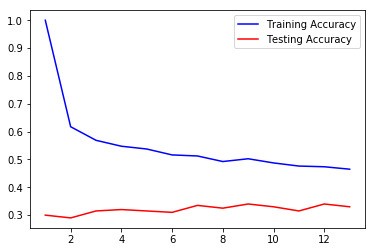

In [19]:
#Generate Plot
sns.lineplot(np.arange(1,num),train_list,color="b",label="Training Accuracy")
sns.lineplot(np.arange(1,num),test_list,color="r",label="Testing Accuracy")
plt.show()

In [20]:
print(f"We got the highest Accuracy {max(test_list)} at k={test_list.index(max(test_list))+1}")

We got the highest Accuracy 0.34 at k=9


We can observe above that we get maximum testing accuracy for k=9. So lets create a KNeighborsClassifier with number of neighbors as 9.

In [21]:
#Setup K Classifier with k=9 and fit the model.
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [22]:
print(f"The Accuracy Score at k=9 is {metrics.accuracy_score(y_test,knn.predict(x_test))}")

The Accuracy Score at k=9 is 0.34


<b>Confusion Matrix</b>
<p>A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.<p/>

In [23]:
#Import confusion_matrix module.
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test,knn.predict(x_test))

array([[26,  7, 13,  5],
       [ 6, 15, 11, 12],
       [21, 10, 18,  5],
       [18, 12, 12,  9]], dtype=int64)

<b>Classification Report</b>

<p>Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.</p>

In [25]:
#Import classification_report module.
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,knn.predict(x_test)))

             precision    recall  f1-score   support

          1       0.37      0.51      0.43        51
          2       0.34      0.34      0.34        44
          3       0.33      0.33      0.33        54
          4       0.29      0.18      0.22        51

avg / total       0.33      0.34      0.33       200



<b>Cross Validation</b>
<p>Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.</p>

<b>Hyperparameter tuning</b>
<p>We have selected a value of k=9 by looking at the curve we have plotted using Accuracy score and different K Values. But this method is the most primitive one.</p>
<p>There is a better way of doing it which involves:
</p>
<ul>
<li>Trying a bunch of different hyperparameter values</li>
<li>Fitting all of them separately</li>
<li>Checking how well each performs</li>
<li>Choosing the best performing one</li>
<li>Using cross-validation every time</li>
</ul>
<p>And fortunately we have Scikit-learn, which provides a simplest way of achieving this using GridSearchCV</p>

In [27]:
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [28]:
parameter = {"n_neighbors":np.arange(1,50)}

In [29]:
knearest = KNeighborsClassifier()
knn_cv = GridSearchCV(knearest,parameter,cv=4)
knn_cv.fit(x,y)

GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
knn_cv.best_score_

0.39

In [31]:
knn_cv.best_params_

{'n_neighbors': 33}

From above we can conclude the number of neighbors as 33 achieves the best score of 0.39 ie, 39%.